In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the teaching assignment monitoring outcome data at the school level

In [77]:
df = pd.read_csv('course_staff_2021_school_level.csv', low_memory=False)
df.head()

,Academic Year,Aggregate Level,County Code,District Code,School Code,County Name,District Name,School Name,Charter School,DASS,...,Incomplete FTE (count),Unknown FTE (count),N/A FTE (count),Clear FTE (percent),Out-of-Field FTE (percent),Intern FTE (percent),Ineffective FTE (percent),Incomplete FTE (percent),Unknown FTE FTE (percent),N/A FTE (percent)
0,2020-21,S,1,10017,136226,Alameda,Alameda County Office of Education,Opportunity Academy,Yes,Yes,...,0.0,0.0,0.0,17.2,82.8,0.0,0.0,0.0,0.0,0.0
1,2020-21,S,1,10017,136226,Alameda,Alameda County Office of Education,Opportunity Academy,Yes,Yes,...,0.0,0.0,0.0,79.3,20.7,0.0,0.0,0.0,0.0,0.0
2,2020-21,S,1,10017,136226,Alameda,Alameda County Office of Education,Opportunity Academy,Yes,Yes,...,0.0,0.0,0.0,23.3,77.7,0.0,0.0,0.0,0.0,0.0
3,2020-21,S,1,10017,136226,Alameda,Alameda County Office of Education,Opportunity Academy,Yes,Yes,...,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
4,2020-21,S,1,10017,136226,Alameda,Alameda County Office of Education,Opportunity Academy,Yes,Yes,...,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0


## Check if there are any issues with the data for each specific course topic
- Key course topics to look at: MATH, SCIE, ENLA, HISS. MATH = Mathematics, SCIE = Science, ENLA = English Language Arts, HISS = History/Social Science
### Key features to look at
- Total FTE (count). FTE: Full-Time Equivalent
- Clear FTE (count). Where the assignment monitoring outcome is clear
- Out-of-Field FTE (count). Where the assignment monitoring outcome is out-of-field
- Intern FTE (count). Where the assignment monitoring outcome is intern
- Ineffective FTE (count). Where the assignment monitoring outcome is ineffective
- Incomplete FTE (count). Where the assignment monitoring outcome is incomplete
- Unknown FTE (count). Where the assignment monitoring outcome is unknown
- N/A FTE (count). Where the assignment monitoring outcome is N/A
### Potential issues that require further clarifications
- Why are the counts not integers? (Adjunct/shared teachers among schools?) 
- Does the "Clear FTE (count)" mean in-field/standard count?  

In [78]:
# Only retain important columns
key_columns = ['School Code', 'Subject Area', 'Total FTE', 'Clear FTE (count)', 'Out-of-Field FTE (count)', 'Intern FTE (count)', 
               'Ineffective FTE (count)', 'Incomplete FTE (count)', 'Unknown FTE (count)', 'N/A FTE (count)']
df_key = df[key_columns]

In [62]:
df_key.head()

,School Code,Subject Area,Total FTE,Clear FTE (count),Out-of-Field FTE (count),Intern FTE (count),Ineffective FTE (count),Incomplete FTE (count),Unknown FTE (count),N/A FTE (count)
0,136226,ARTS,0.64,0.11,0.53,0.0,0.0,0.0,0.0,0.0
1,136226,CTED,0.29,0.23,0.06,0.0,0.0,0.0,0.0,0.0
2,136226,ENLA,1.03,0.24,0.80,0.0,0.0,0.0,0.0,0.0
3,136226,HISS,1.26,0.00,1.26,0.0,0.0,0.0,0.0,0.0
4,136226,HLTH,0.12,0.00,0.12,0.0,0.0,0.0,0.0,0.0


### Check missing values for the Total FTE column 

In [79]:
df_key_math = df_key[df_key['Subject Area'] == 'MATH']
# creating bool series True for NaN values 
bool_series = pd.isnull(df_key_math['Total FTE']) 
# displaying data only with 'Total FTE' = NaN 
df_key_math[bool_series] 

,School Code,Subject Area,Total FTE,Clear FTE (count),Out-of-Field FTE (count),Intern FTE (count),Ineffective FTE (count),Incomplete FTE (count),Unknown FTE (count),N/A FTE (count)


In [80]:
df_key_scie = df_key[df_key['Subject Area'] == 'SCIE']
# creating bool series True for NaN values 
bool_series = pd.isnull(df_key_scie['Total FTE']) 
# displaying data only with 'Total FTE' = NaN 
df_key_scie[bool_series] 

,School Code,Subject Area,Total FTE,Clear FTE (count),Out-of-Field FTE (count),Intern FTE (count),Ineffective FTE (count),Incomplete FTE (count),Unknown FTE (count),N/A FTE (count)


In [81]:
df_key_enla = df_key[df_key['Subject Area'] == 'ENLA']
# creating bool series True for NaN values 
bool_series = pd.isnull(df_key_enla['Total FTE']) 
# displaying data only with 'Total FTE' = NaN 
df_key_enla[bool_series] 

,School Code,Subject Area,Total FTE,Clear FTE (count),Out-of-Field FTE (count),Intern FTE (count),Ineffective FTE (count),Incomplete FTE (count),Unknown FTE (count),N/A FTE (count)


In [82]:
df_key_hiss = df_key[df_key['Subject Area'] == 'HISS']
# creating bool series True for NaN values 
bool_series = pd.isnull(df_key_hiss['Total FTE']) 
# displaying data only with 'Total FTE' = NaN 
df_key_hiss[bool_series] 

,School Code,Subject Area,Total FTE,Clear FTE (count),Out-of-Field FTE (count),Intern FTE (count),Ineffective FTE (count),Incomplete FTE (count),Unknown FTE (count),N/A FTE (count)


All good!

### Get a basic sense of the distribution of each feature
- Histogram plot (frequency)
- Box plot (outliers)

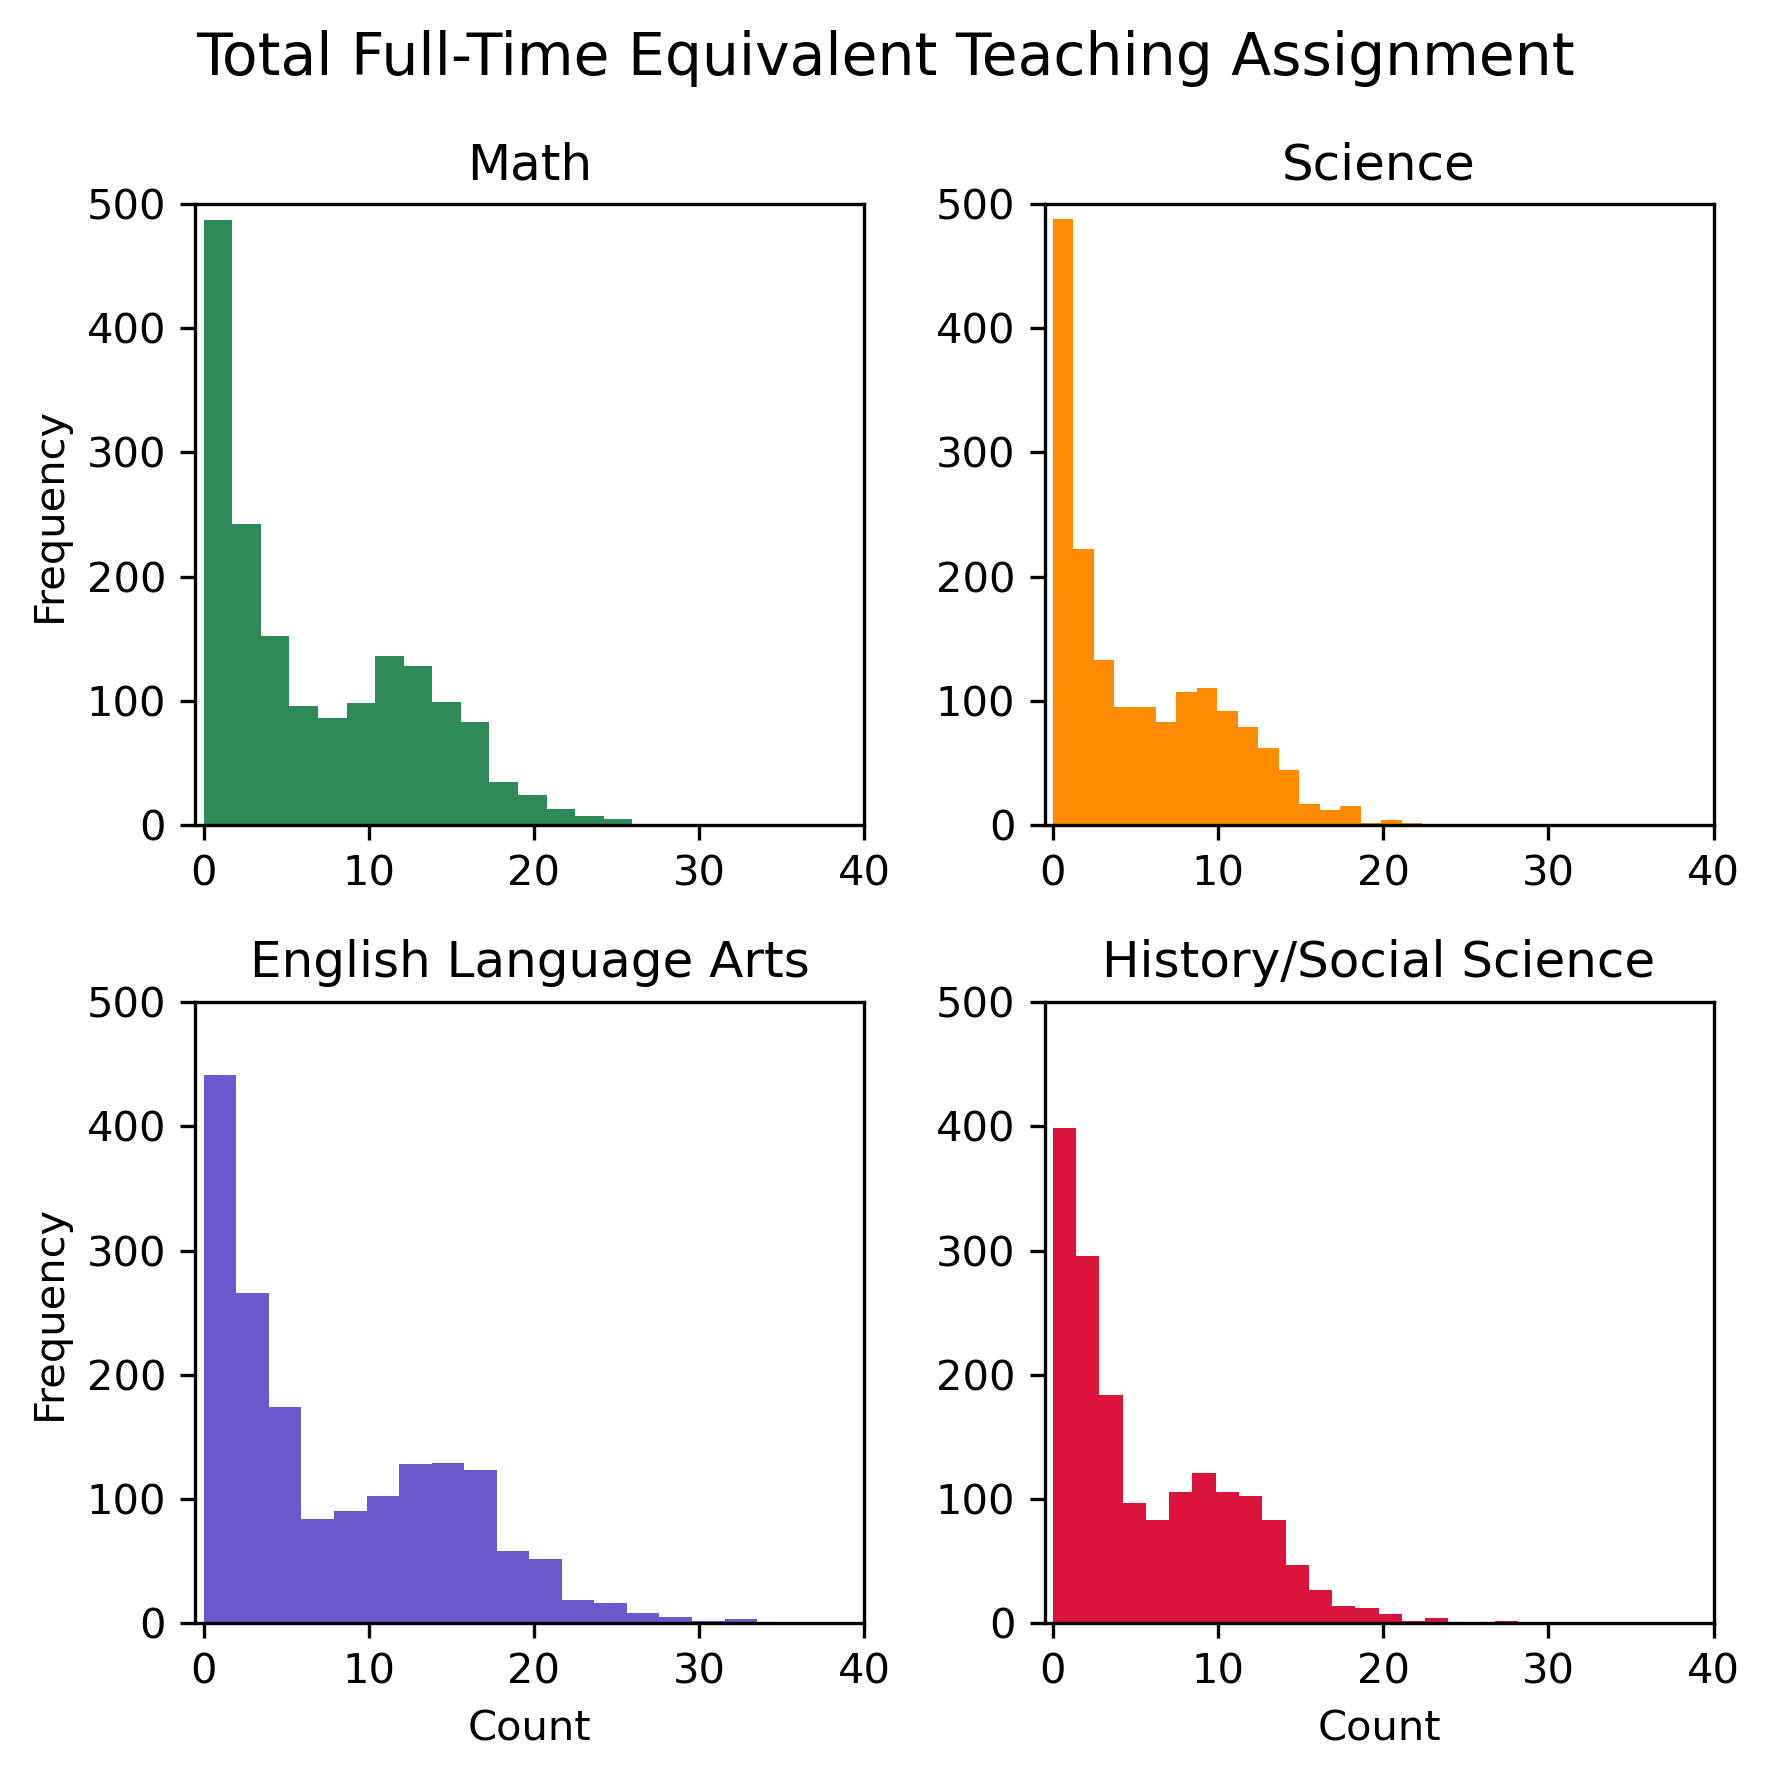

In [68]:
# Visualize the frequecy histogram
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)
n_bins = 20

colors = ['seagreen', 'darkorange', 'slateblue', 'crimson']
ax0.hist(df_key_math['Total FTE'], n_bins, color = colors[0])
ax0.set_ylabel('Frequency')
ax0.set_title('Math')

ax1.hist(df_key_scie['Total FTE'], n_bins, color = colors[1])
ax1.set_title('Science')

ax2.hist(df_key_enla['Total FTE'], n_bins, color = colors[2])
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Count')
ax2.set_title('English Language Arts')

ax3.hist(df_key_hiss['Total FTE'], n_bins, color = colors[3])
ax3.set_xlabel('Count')
ax3.set_title('History/Social Science')

# Setting the same value range for all axes.
plt.setp(((ax0, ax1), (ax2, ax3)), xlim = (-0.5, 40), ylim = (0, 500))
fig.suptitle("Total Full-Time Equivalent Teaching Assignment", fontsize = 14)

# Figure settings 
fig.tight_layout()
plt.rcParams['figure.figsize'] = (6, 6) 
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
plt.savefig(r"Total_FTE_Histogram.jpg", bbox_inches='tight')
plt.show()

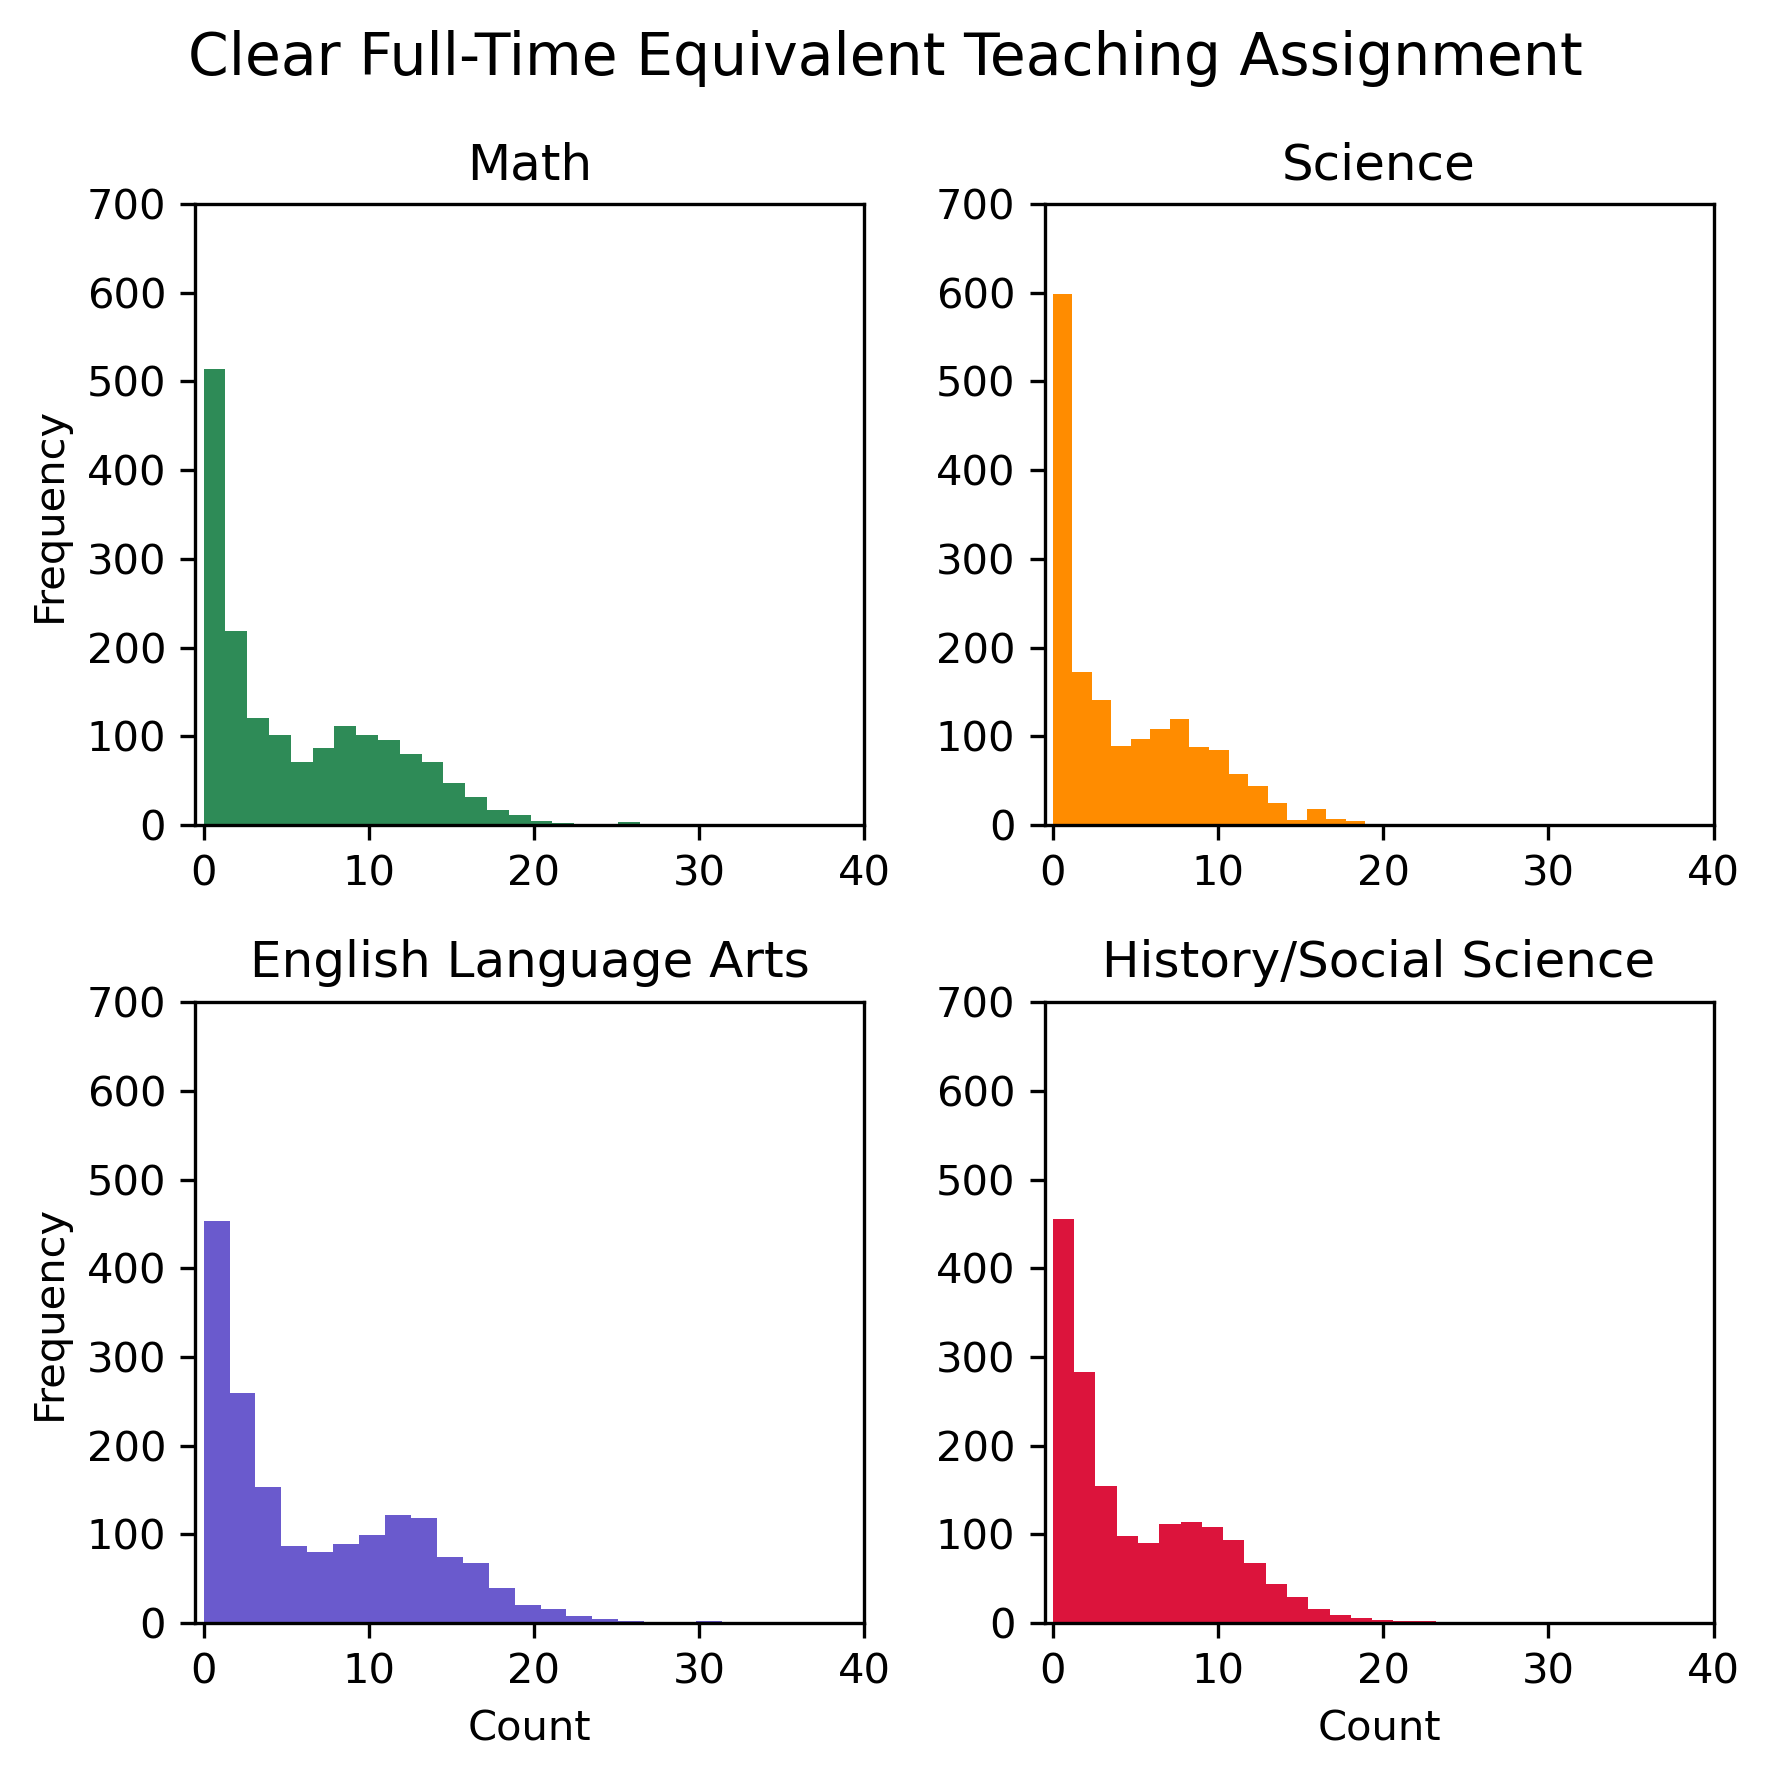

In [69]:
# Visualize the frequecy histogram
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)
n_bins = 20

colors = ['seagreen', 'darkorange', 'slateblue', 'crimson']
ax0.hist(df_key_math['Clear FTE (count)'], n_bins, color = colors[0])
ax0.set_ylabel('Frequency')
ax0.set_title('Math')

ax1.hist(df_key_scie['Clear FTE (count)'], n_bins, color = colors[1])
ax1.set_title('Science')

ax2.hist(df_key_enla['Clear FTE (count)'], n_bins, color = colors[2])
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Count')
ax2.set_title('English Language Arts')

ax3.hist(df_key_hiss['Clear FTE (count)'], n_bins, color = colors[3])
ax3.set_xlabel('Count')
ax3.set_title('History/Social Science')

# Setting the same value range for all axes.
plt.setp(((ax0, ax1), (ax2, ax3)), xlim = (-0.5, 40), ylim = (0, 700))
fig.suptitle("Clear Full-Time Equivalent Teaching Assignment", fontsize = 14)

# Figure settings 
fig.tight_layout()
plt.rcParams['figure.figsize'] = (6, 6) 
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
plt.savefig(r"Clear_FTE_Histogram.jpg", bbox_inches='tight')

plt.show()

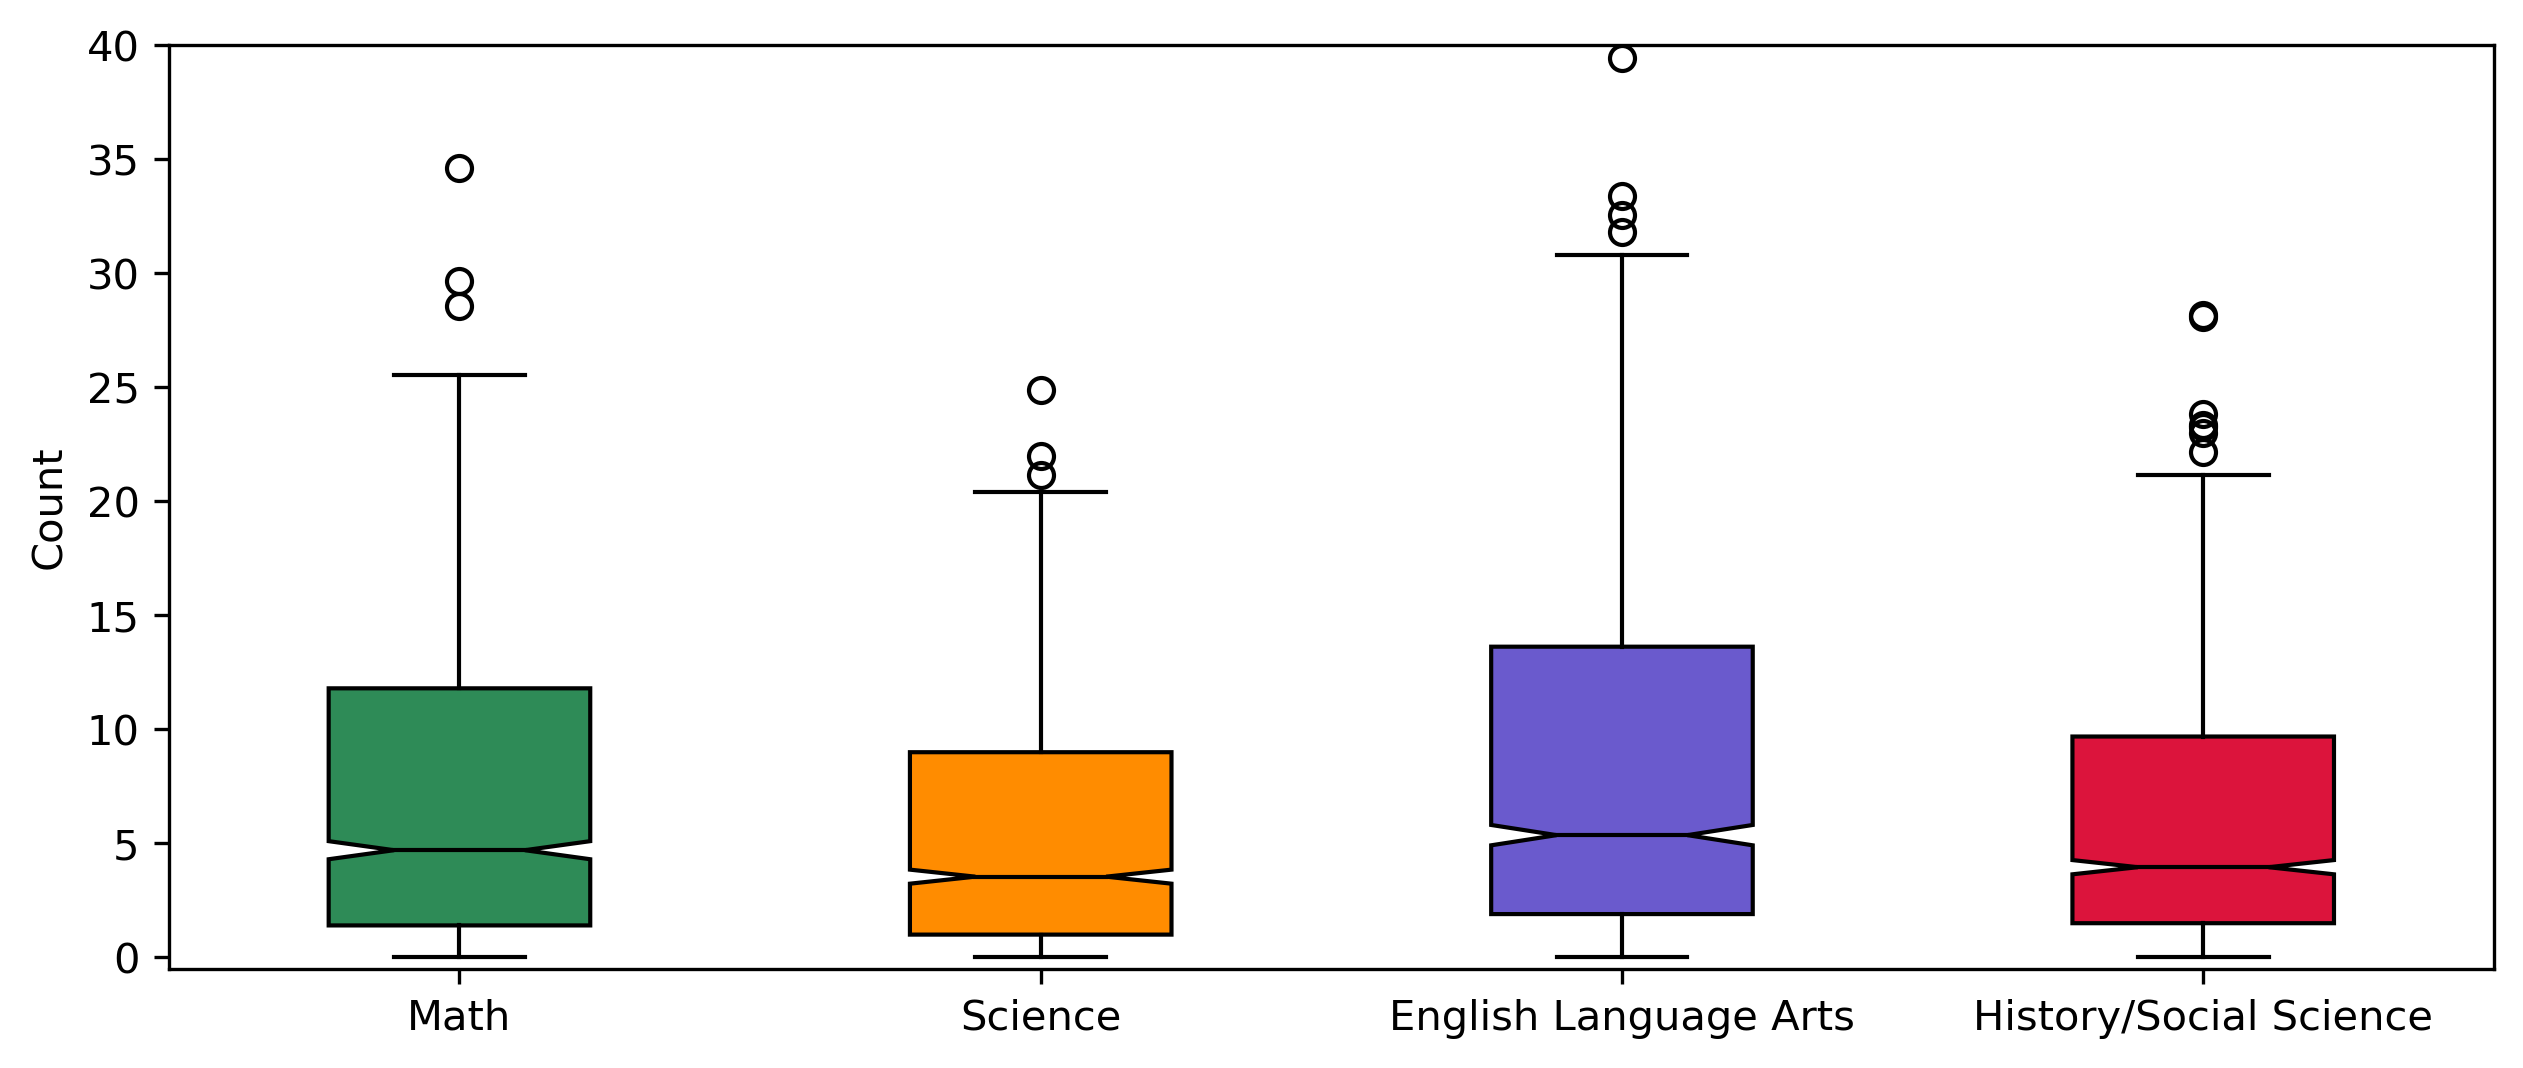

In [71]:
# Visualize the boxplot
x0 = df_key_math['Total FTE']
x1 = df_key_scie['Total FTE']
x2 = df_key_enla['Total FTE']
x3 = df_key_hiss['Total FTE']
data = [x0, x1, x2, x3]
categories = ['Math', 'Science', 'English Language Arts', 'History/Social Science']
bp = plt.boxplot(data, patch_artist = True, notch ='True', labels = categories)
plt.ylim(-0.5, 40)
plt.ylabel('Count')


# Set the color of the box
colors = ['seagreen', 'darkorange', 'slateblue', 'crimson'] 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
# Changing color of medians
for median in bp['medians']:
    median.set(color ='black')

# Figure settings   
plt.rcParams['figure.figsize'] = (10, 4) 
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
plt.savefig(r"Total_FTE_Boxplot.jpg", bbox_inches='tight')

plt.show()


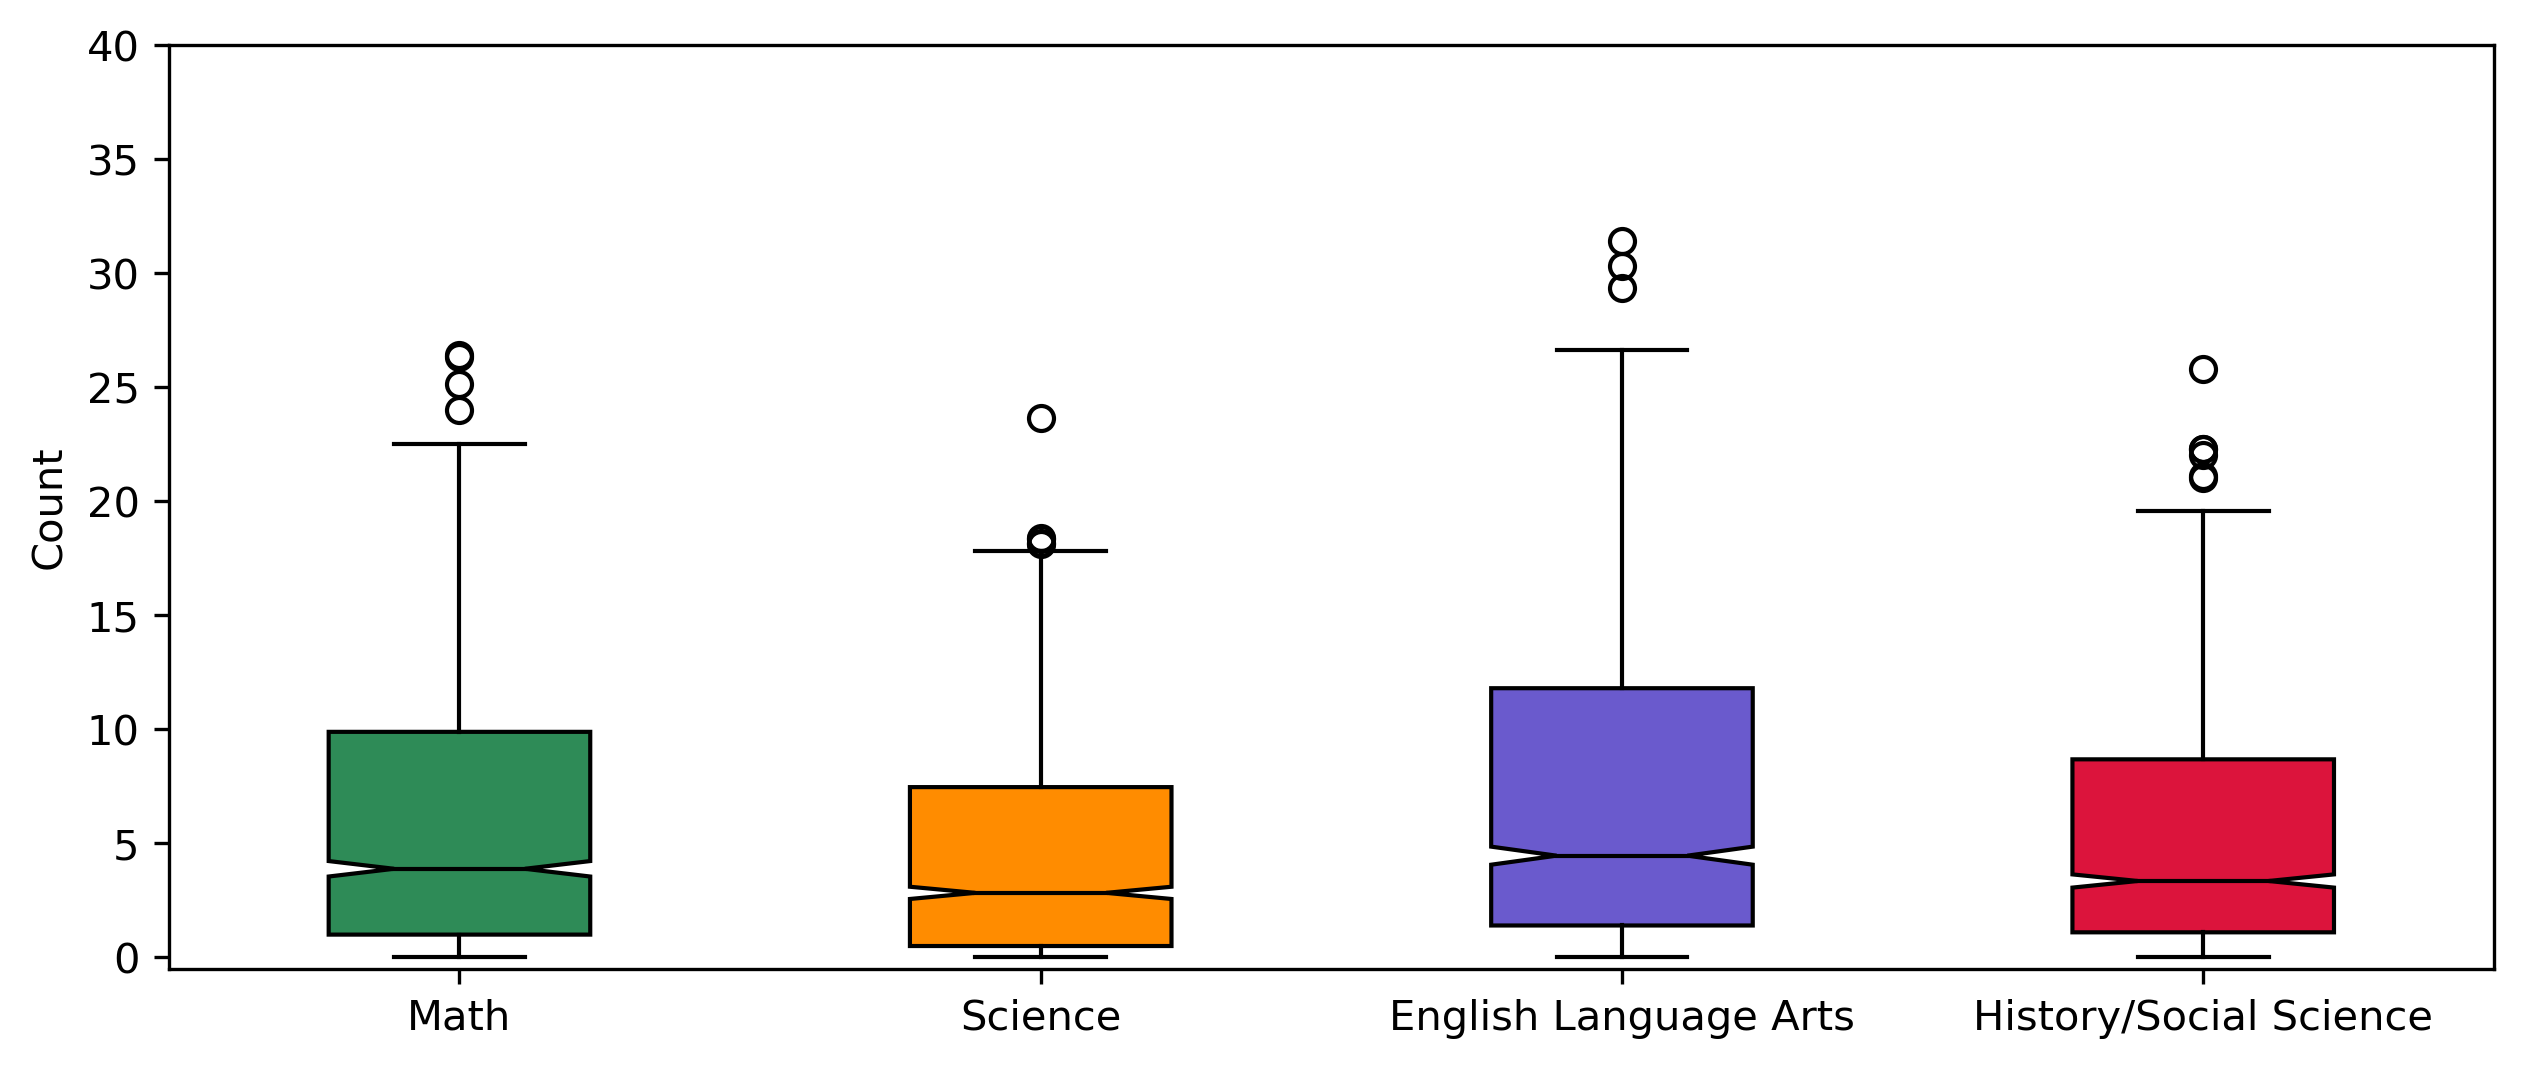

In [72]:
# Visualize the boxplot
x0 = df_key_math['Clear FTE (count)']
x1 = df_key_scie['Clear FTE (count)']
x2 = df_key_enla['Clear FTE (count)']
x3 = df_key_hiss['Clear FTE (count)']
data = [x0, x1, x2, x3]
categories = ['Math', 'Science', 'English Language Arts', 'History/Social Science']
bp = plt.boxplot(data, patch_artist = True, notch ='True', labels = categories)
plt.ylim(-0.5, 40)
plt.ylabel('Count')

# Set the color of the box
colors = ['seagreen', 'darkorange', 'slateblue', 'crimson'] 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
# Changing color of medians
for median in bp['medians']:
    median.set(color ='black')

# Figure settings   
plt.rcParams['figure.figsize'] = (10, 4) 
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
plt.savefig(r"Clear_FTE_Boxplot.jpg", bbox_inches='tight')

plt.show()


### Check the correlation of the counts among different topics

In [89]:
# Construct a new dataframe where each column represents a course category
df_total_FTE = pd.DataFrame()
df_key_collections = df_key[(df_key['Subject Area'] == 'MATH') | (df_key['Subject Area'] == 'SCIE') | (df_key['Subject Area'] == 'ENLA') | (df_key['Subject Area'] == 'HISS')]
for index, row in df_key_collections.iterrows():
    school_code = row['School Code']
    df_total_FTE.loc[school_code, row['Subject Area']] = row['Total FTE']
df_total_FTE.head()

,ENLA,HISS,MATH,SCIE
136226,1.03,1.26,0.69,0.80
130229,7.84,6.94,8.27,5.40
106401,0.78,0.33,0.50,0.55
130625,1.90,1.73,2.00,0.50
134304,1.13,0.86,0.75,0.60


In [90]:
# Calculate the pearson correlation matrix for the column values
pear_corr = df_total_FTE.corr(method='pearson')
pear_corr.style.background_gradient(cmap='Greens', axis=0)

,ENLA,HISS,MATH,SCIE
ENLA,1.000000,0.956174,0.976449,0.950158
HISS,0.956174,1.000000,0.959901,0.951020
MATH,0.976449,0.959901,1.000000,0.961312
SCIE,0.950158,0.951020,0.961312,1.000000


In [91]:
# Construct a new dataframe where each column represents a course category
df_clear_FTE = pd.DataFrame()
for index, row in df_key_collections.iterrows():
    school_code = row['School Code']
    df_clear_FTE.loc[school_code, row['Subject Area']] = row['Clear FTE (count)']
df_clear_FTE.head()

,ENLA,HISS,MATH,SCIE
136226,0.24,0.00,0.00,0.00
130229,6.81,6.68,7.66,5.40
106401,0.78,0.00,0.50,0.30
130625,1.70,0.60,0.00,0.19
134304,0.47,0.86,0.75,0.60


In [92]:
# Calculate the pearson correlation matrix for the column values
pear_corr = df_clear_FTE.corr(method='pearson')
pear_corr.style.background_gradient(cmap='Greens', axis=0)

,ENLA,HISS,MATH,SCIE
ENLA,1.000000,0.957729,0.969279,0.943459
HISS,0.957729,1.000000,0.953486,0.942874
MATH,0.969279,0.953486,1.000000,0.950026
SCIE,0.943459,0.942874,0.950026,1.000000


- The counts may be proportional to the number of students in the school
- Maybe we can use only one of the feature as a representative one